## Weight Initialization in Neural Networks
#### why **weight initialization** is needed? [Read More]('https://www.pinecone.io/learn/weight-initialization/')

#### 🧪 Naive Initialization (Bad Idea)
- Initialize Weights to Zero
    If all weights 𝑊 are initialized to zero:
    - All neurons in the same layer learn the same gradients.

    - This causes symmetry; effectively, only one neuron is learning.

    - The network never learns diverse representations.

❌ Leads to symmetry problem and poor learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../../datasets/ushape.csv', names=['X', 'Y', 'class'])

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


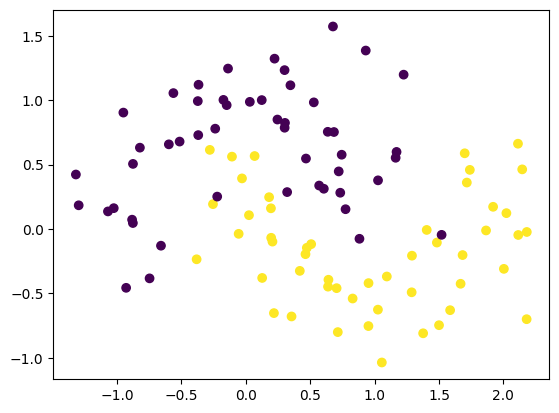

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [6]:
# import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

### With ReLU and Tanh Activation Functions, What Happens if We Initialize Weights as 0?

#### ReLU (Rectified Linear Unit)
- **Symmetry Problem**: If all weights are initialized to 0, every neuron in the network will compute the same output during the forward pass. This is because the gradient of the loss with respect to the weights will be identical for all neurons.
- **No Learning**: During backpropagation, the gradients for all weights will be the same, and the network will fail to break symmetry. As a result, all neurons in a layer will learn the same features, effectively reducing the capacity of the network.
- **Dead Neurons**: ReLU activation can lead to "dead neurons" where some neurons output 0 for all inputs. If weights are initialized to 0, this problem is exacerbated because the neurons may never activate and learn.

#### Tanh (Hyperbolic Tangent)
- **Symmetry Problem**: Similar to ReLU, initializing weights to 0 causes all neurons to compute the same output and gradients, leading to symmetry that the network cannot break.
- **Vanishing Gradients**: Tanh activation outputs values in the range [-1, 1]. If weights are initialized to 0, the gradients during backpropagation may become very small, slowing down or completely halting learning.

- For ReLU, dead neurons can become a significant problem, while for Tanh, vanishing gradients can hinder training.

In [7]:
relu_model = Sequential()

relu_model.add(Dense(3, activation='relu', input_dim=2))
relu_model.add(Dense(1, activation='sigmoid'))

relu_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
initial_weights = relu_model.get_weights()
initial_weights

[array([[ 0.49714637, -0.312378  , -0.6171399 ],
        [ 0.7864578 , -0.9151786 ,  0.90779614]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.38763815],
        [ 0.41310883],
        [-0.20387661]], dtype=float32),
 array([0.], dtype=float32)]

#### Setting initial weights as 0.

In [9]:
initial_weights[0] = np.zeros(relu_model.get_weights()[0].shape)
initial_weights[1] = np.zeros(relu_model.get_weights()[1].shape)
initial_weights[2] = np.zeros(relu_model.get_weights()[2].shape)
initial_weights[3] = np.zeros(relu_model.get_weights()[3].shape)

relu_model.set_weights(initial_weights)
relu_model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
relu_model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [11]:
history = relu_model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 73ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [======

#### You can clearly see how weights remain unchanged i.e. 0.
- Same behavior is observed for Tanh AF

In [12]:
relu_model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.00664208], dtype=float32)]

#### Core Problems of Initializing Weights as 0: Comparison of Sigmoid, ReLU, and Tanh

#### 1. **Symmetry Problem**
- **Sigmoid**: If all weights are initialized to 0, every neuron in the network computes the same output during the forward pass. This results in identical gradients for all neurons during backpropagation, preventing the network from breaking symmetry. Consequently, all neurons in a layer learn the same features, reducing the model's capacity.
---

#### 2. **Vanishing Gradients**
- **Sigmoid**: The Sigmoid activation function outputs values in the range (0, 1). When weights are initialized to 0, the gradients during backpropagation become very small, especially for neurons in deeper layers. This slows down or completely halts learning, as the updates to weights are negligible.
- **ReLU**: ReLU does not suffer from vanishing gradients as severely as Sigmoid because its gradient is either 0 or 1. However, initializing weights to 0 exacerbates the "dead neuron" problem (explained below), which indirectly affects learning.
- **Tanh**: Tanh outputs values in the range (-1, 1). While it has a broader range than Sigmoid, it still suffers from vanishing gradients when weights are initialized to 0. This is because the gradients for inputs near the extremes (-1 or 1) are very small, slowing down learning.


#### 3. **Dead Neurons**
- **Sigmoid**: Dead neurons are not a significant issue for Sigmoid because the function is always active (non-zero gradient) for all inputs. However, the vanishing gradient problem can still hinder learning.
- **ReLU**: ReLU is prone to the "dead neuron" problem, where neurons output 0 for all inputs. If weights are initialized to 0, neurons may never activate, and their gradients remain 0 throughout training. This prevents these neurons from learning any features.
- **Tanh**: Dead neurons are not a concern for Tanh, as it is always active for all inputs. However, the vanishing gradient problem can still significantly impact training.

---

#### 4. **Learning Dynamics**
- **Sigmoid**: The combination of symmetry and vanishing gradients makes learning very slow or impossible when weights are initialized to 0. The network struggles to converge, especially for deeper architectures.
- **ReLU**: While ReLU avoids vanishing gradients, the symmetry problem and dead neurons severely hinder learning when weights are initialized to 0. The network fails to utilize the full capacity of its neurons.
- **Tanh**: Tanh suffers from both symmetry and vanishing gradients, leading to slow or stalled learning. While it has a broader range than Sigmoid, it still faces similar challenges when weights are initialized to 0.

In [13]:
sig_model = Sequential()

sig_model.add(Dense(10, activation='sigmoid', input_dim=2))
sig_model.add(Dense(1, activation='sigmoid'))

sig_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Set parameters to 0
sig_model.get_weights()

[array([[ 0.45937937,  0.33456415, -0.05582923,  0.01951486, -0.41542462,
          0.60169095,  0.09893751, -0.5449407 ,  0.3087737 ,  0.03146398],
        [ 0.14629573, -0.46702382, -0.25469103, -0.41645333, -0.34386063,
         -0.59368217,  0.05847067, -0.20176691,  0.31180006, -0.48839682]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.17302752],
        [ 0.13931769],
        [ 0.12821978],
        [ 0.14196068],
        [-0.26122752],
        [-0.29126072],
        [-0.6962638 ],
        [ 0.03540218],
        [-0.15104711],
        [-0.39071724]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
initial_weights = sig_model.get_weights()

In [16]:
initial_weights[0] = np.zeros(sig_model.get_weights()[0].shape)
initial_weights[1] = np.zeros(sig_model.get_weights()[1].shape)
initial_weights[2] = np.zeros(sig_model.get_weights()[2].shape)
initial_weights[3] = np.zeros(sig_model.get_weights()[3].shape)

In [17]:
sig_model.set_weights(initial_weights)

In [18]:
sig_model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
sig_model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
history = sig_model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 68ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

#### You can see how weights from each node is same

In [ ]:
sig_model.get_weights()

[array([[-0.4549992 , -0.4549992 , -0.4549992 , -0.4549992 , -0.4549992 ,
         -0.4549992 , -0.4549992 , -0.4549992 , -0.4549992 , -0.4549992 ],
        [ 0.47610933,  0.47610933,  0.47610933,  0.47610933,  0.47610933,
          0.47610933,  0.47610933,  0.47610933,  0.47610933,  0.47610933]],
       dtype=float32),
 array([-0.11618948, -0.11618948, -0.11618948, -0.11618948, -0.11618948,
        -0.11618948, -0.11618948, -0.11618948, -0.11618948, -0.11618948],
       dtype=float32),
 array([[-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464],
        [-0.06833464]], dtype=float32),
 array([0.06662544], dtype=float32)]

9600/9600 [==============================] - 6s 614us/step


<Axes: >

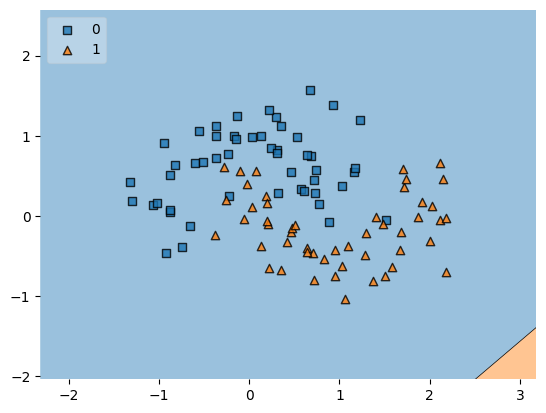

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=sig_model, legend=2)

### Summary Table

| Problem               | Sigmoid                     | ReLU                        | Tanh                       |
|-----------------------|-----------------------------|-----------------------------|----------------------------|
| Symmetry Problem      | Severe                     | Severe                     | Severe                    |
| Vanishing Gradients   | Severe                     | Minimal                    | Moderate                  |
| Dead Neurons          | Minimal                    | Severe                     | Minimal                   |
| Learning Dynamics     | Slow or Stalled            | Stalled (due to symmetry)  | Slow or Stalled           |

#### 🔀 Random Initialization (Uniform or Normal)
Weights sampled from:

- Uniform distribution: 𝑈(−1,1)
- Normal distribution: 𝑁(0,1)

Still problematic in deep networks due to scale mismatch across layers.

❌ Does not scale well as depth increases → causes vanishing/exploding gradients.

In [31]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [32]:
# current weights
initial_weights = model.get_weights()
initial_weights

[array([[-1.1207736 ,  0.21734643],
        [-0.17271364, -0.77336776]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.04837453, -0.22437608],
        [-0.45672548,  1.052245  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.42152262,  0.87691844],
        [ 0.08844042, -0.7119583 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.42137015, -0.9501635 ],
        [ 1.0586025 ,  0.85648286]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.4492061 ],
        [0.02688932]], dtype=float32),
 array([0.], dtype=float32)]

#### Initialized the model weights with random small values

In [34]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)
model.get_weights()

[array([[-0.01155635, -0.0212263 ],
        [ 0.01082875,  0.01110417]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01546927, -0.00570177],
        [-0.0039839 , -0.0136782 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00356961, -0.00745248],
        [-0.00756   , -0.00906685]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00604542, -0.00204902],
        [ 0.00235312, -0.01094209]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01645667],
        [ 0.00896417]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 74ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [36]:
model.get_weights()

[array([[-0.01147469, -0.02204683],
        [ 0.01075004,  0.01189799]], dtype=float32),
 array([9.8479381e-07, 3.2763076e-06], dtype=float32),
 array([[ 0.01491161, -0.00678106],
        [-0.00481028, -0.01528024]], dtype=float32),
 array([-8.9312198e-06, -1.0314295e-04], dtype=float32),
 array([[-0.00286228, -0.00708446],
        [-0.00981009, -0.01012709]], dtype=float32),
 array([3.1925738e-04, 2.9818690e-05], dtype=float32),
 array([[ 0.00124211,  0.00193578],
        [ 0.00046195, -0.00797138]], dtype=float32),
 array([-1.4086398e-04, -1.2696064e-06], dtype=float32),
 array([[-2.1841195e-03],
        [ 1.7768452e-06]], dtype=float32),
 array([0.00184919], dtype=float32)]